In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:
df = pd.read_csv("../data/coches_segunda_mano-18-02-2025_limpio.csv")

In [4]:
df

,modelo_titulo,provincia,kilometraje,combustible,distintivo_ambiental,garantia,cambio_automatico,carroceria,plazas,potencia,...,consumo_medio,certificado,fecha_extraccion,referencia,marca_sola,mes_matricula,anio_matricula,nombre_vendedor_profesional,peninsula_y_baleares,comunidad
0,Mustang 5.0 Ti-VCT V8+714 CV+RECARO+KAMERA+LED+,Madrid,23000,Gasolina,C,12.0,True,Pequeño,NaN,714.0,...,NaN,False,2025-02-18 11:15:17.922326,15231216,FORD,6,2019,GERMACARS MOBILITY,True,Comunidad de Madrid
1,Mustang 5.0 Ti-VCT V8 GT350 LOOK Shelby,Madrid,41000,Gasolina,C,12.0,False,Pequeño,NaN,450.0,...,NaN,False,2025-02-18 11:15:45.618010,15221898,FORD,1,2019,GERMACARS MOBILITY,True,Comunidad de Madrid
2,Focus 2.3 Ecoboost ST 3,Madrid,89552,Gasolina,C,12.0,False,Berlina,5.0,280.0,...,7.6,False,2025-02-18 11:15:53.589509,15036704,FORD,12,2020,GERMACARS MOBILITY,True,Comunidad de Madrid
3,X4 xDrive 20dA xLine,Granada,25600,Diésel,ECO,24.0,True,Coupe,5.0,190.0,...,NaN,False,2025-02-18 11:16:00.414864,15227266,BMW,4,2024,FRAMACAR AUTOMOVILES,True,Andalucía
4,X4 xDrive 20dA,Granada,95800,Diésel,C,12.0,True,Coupe,5.0,190.0,...,5.0,False,2025-02-18 11:16:07.869053,15304683,BMW,2,2020,FRAMACAR AUTOMOVILES,True,Andalucía
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Polo 1.0 TSI Life 70kW,Málaga,15000,Gasolina,C,18.0,False,Berlina,5.0,95.0,...,NaN,True,2025-02-18 12:16:26.009783,15404406,VOLKSWAGEN,5,2023,MARTINSA MOTOR,True,Andalucía
339,Serie 1 M135iA xDrive (9.75),Alicante,50000,Gasolina,C,12.0,True,Berlina,4.0,306.0,...,7.1,False,2025-02-18 12:16:31.794679,15442000,BMW,9,2019,AUTOS GERSAN,True,Comunidad Valenciana
340,X2 sDrive 18dA,Málaga,31000,Diésel,C,12.0,True,Todo Terreno,5.0,150.0,...,4.4,True,2025-02-18 12:16:40.220341,15426557,BMW,11,2021,MARTINSA MOTOR,True,Andalucía
341,X2 sDrive 18iA Advantage,Málaga,39000,Gasolina,C,12.0,True,Todo Terreno,5.0,136.0,...,5.4,True,2025-02-18 12:16:48.847980,15427200,BMW,7,2020,MARTINSA MOTOR,True,Andalucía


Transformaciones a las categorias

In [5]:
df["carroceria"].unique()

array(['Pequeño', 'Berlina', 'Coupe', 'Todo Terreno', '4x4, SUV o pickup',
       'Convertible', 'Monovolumen', 'Familiar', nan,
       'Descapotable o convertible', 'Roadster'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo_titulo                343 non-null    object 
 1   provincia                    340 non-null    object 
 2   kilometraje                  343 non-null    int64  
 3   combustible                  343 non-null    object 
 4   distintivo_ambiental         323 non-null    object 
 5   garantia                     343 non-null    float64
 6   cambio_automatico            343 non-null    bool   
 7   carroceria                   342 non-null    object 
 8   plazas                       310 non-null    float64
 9   potencia                     341 non-null    float64
 10  puertas                      343 non-null    int64  
 11  color                        343 non-null    object 
 12  precio                       343 non-null    int64  
 13  vendedor_profesional

## Relación de variables entre si

In [7]:
columnas_categoricas = ['distintivo_ambiental', 'garantia', 'carroceria', 'plazas', 'puertas', 'consumo_medio', 'vendedor_profesional']

In [8]:
def formatear_texto(columna):
    return columna.replace('_', ' ').title()

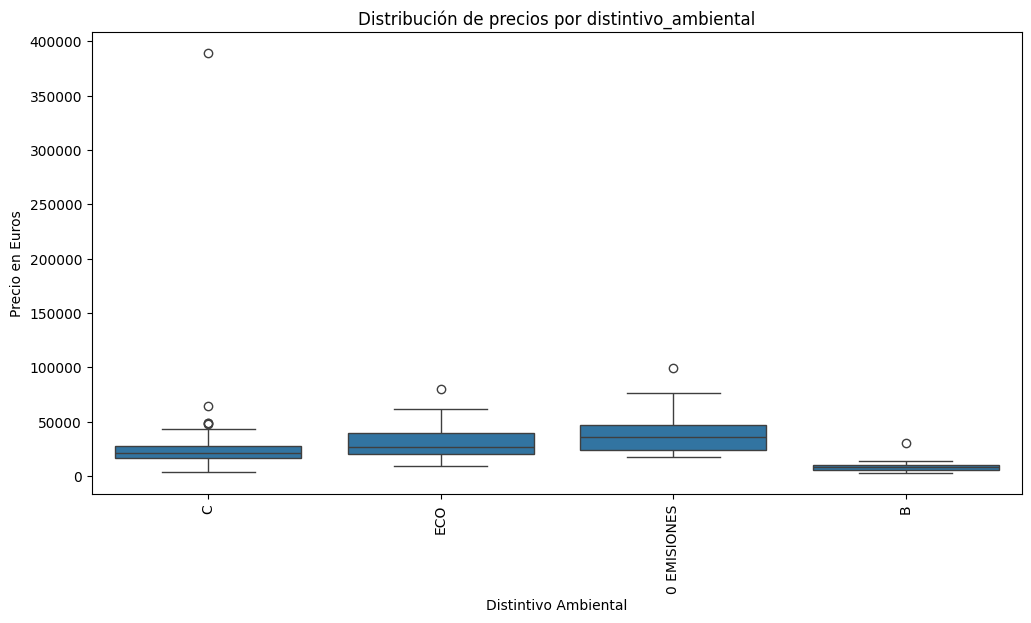

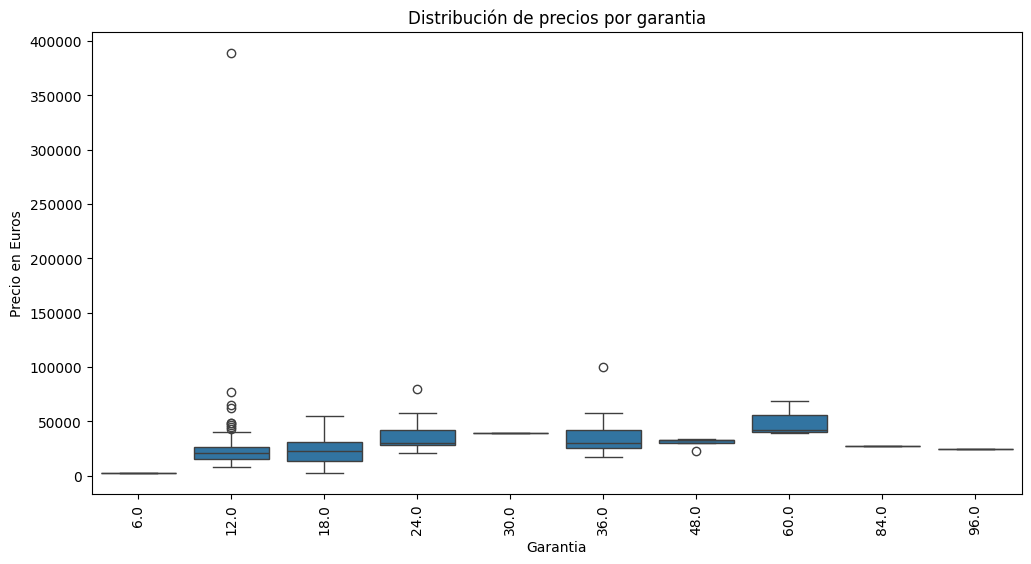

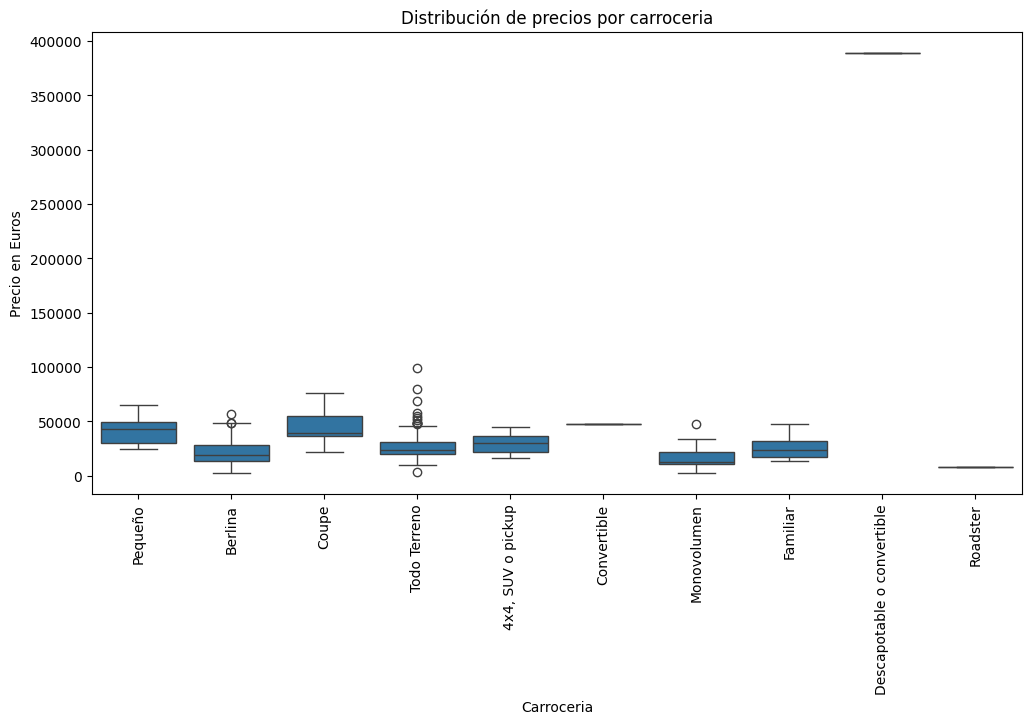

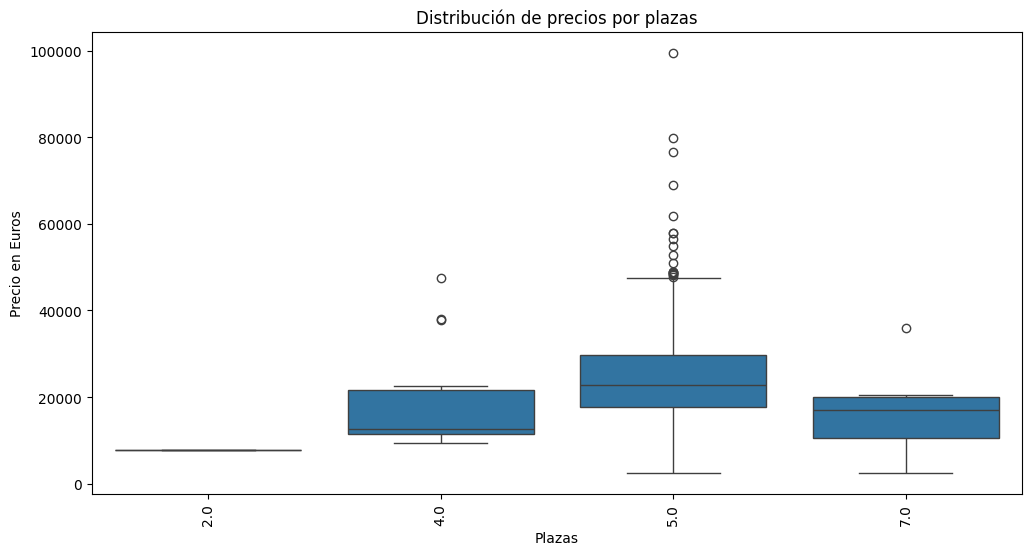

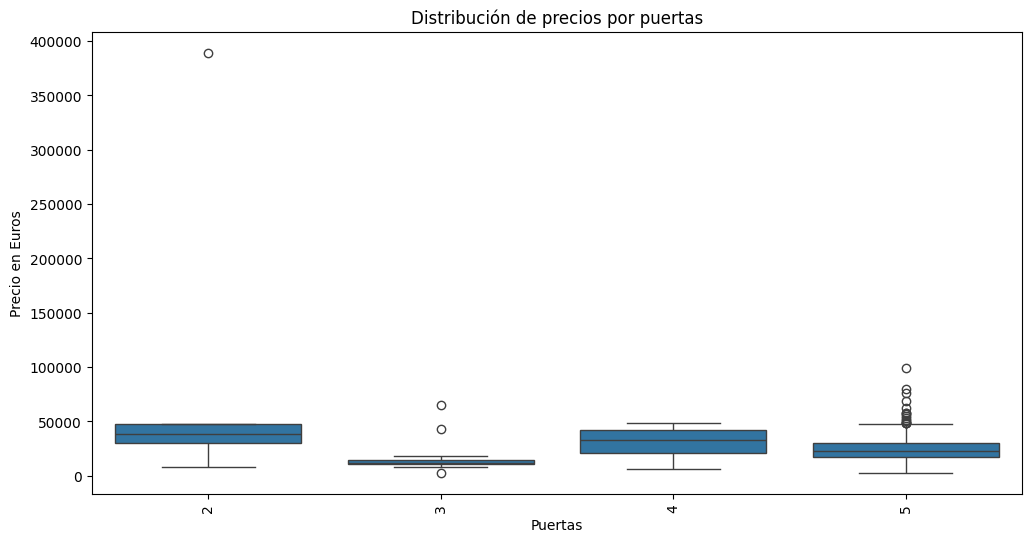

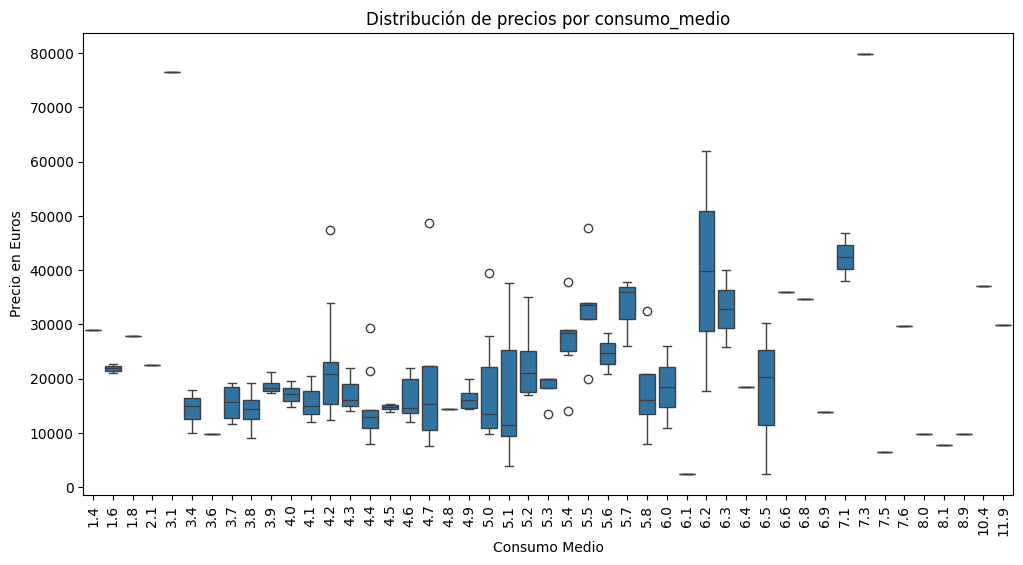

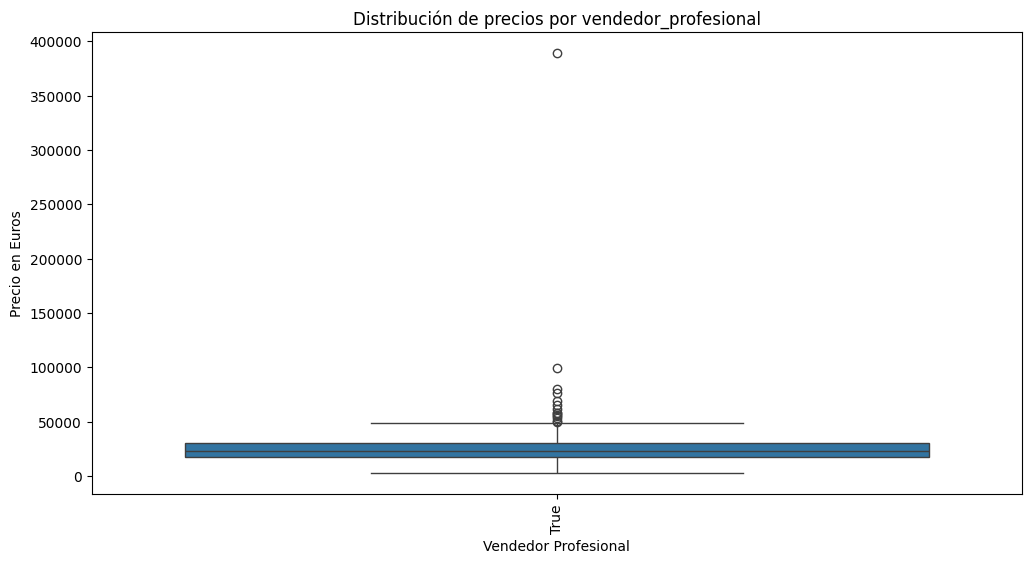

In [9]:
for columna in columnas_categoricas:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x= columna, y='precio', data=df)
    plt.xlabel(f"{formatear_texto(columna)}") 
    plt.ylabel("Precio en Euros")
    plt.xticks(rotation=90)
    plt.title(f'Distribución de precios por {columna}')
    plt.show()

In [10]:
columnas_numericas = []

for columna in df.columns:
    if (df[columna].dtype in [np.float64, np.int64]) and (columna != 'referencia'):
        columnas_numericas.append(columna)

columnas_numericas


['kilometraje',
 'garantia',
 'plazas',
 'potencia',
 'puertas',
 'precio',
 'consumo_medio',
 'mes_matricula',
 'anio_matricula']

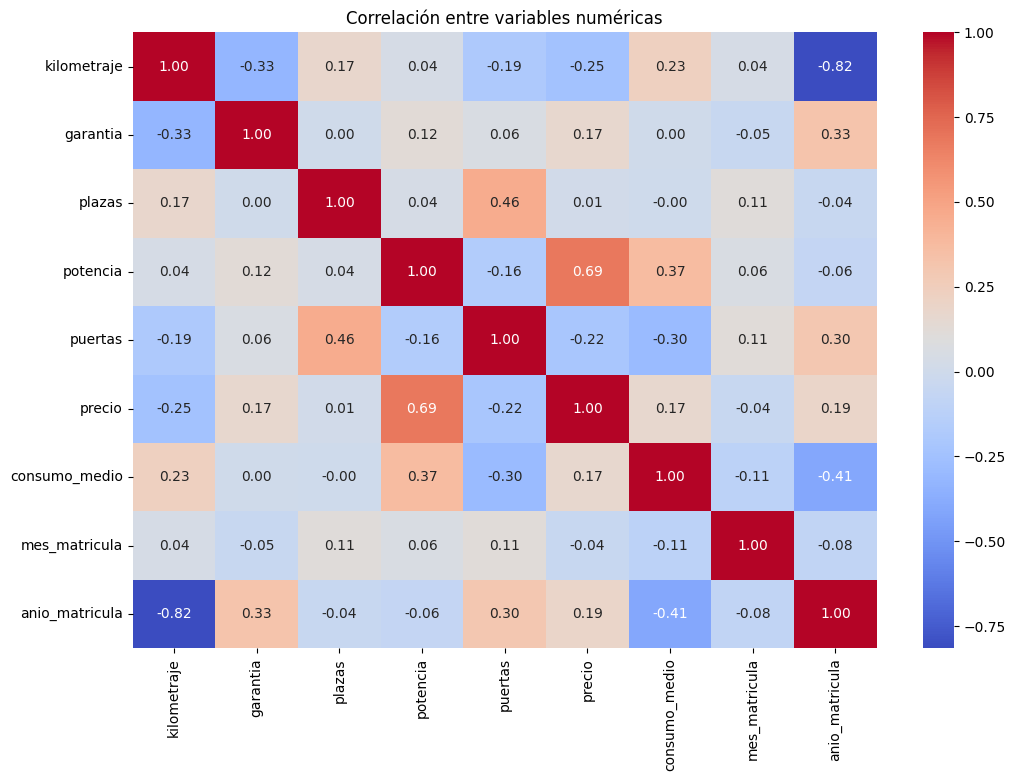

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacion = df[columnas_numericas].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables numéricas')
plt.show()

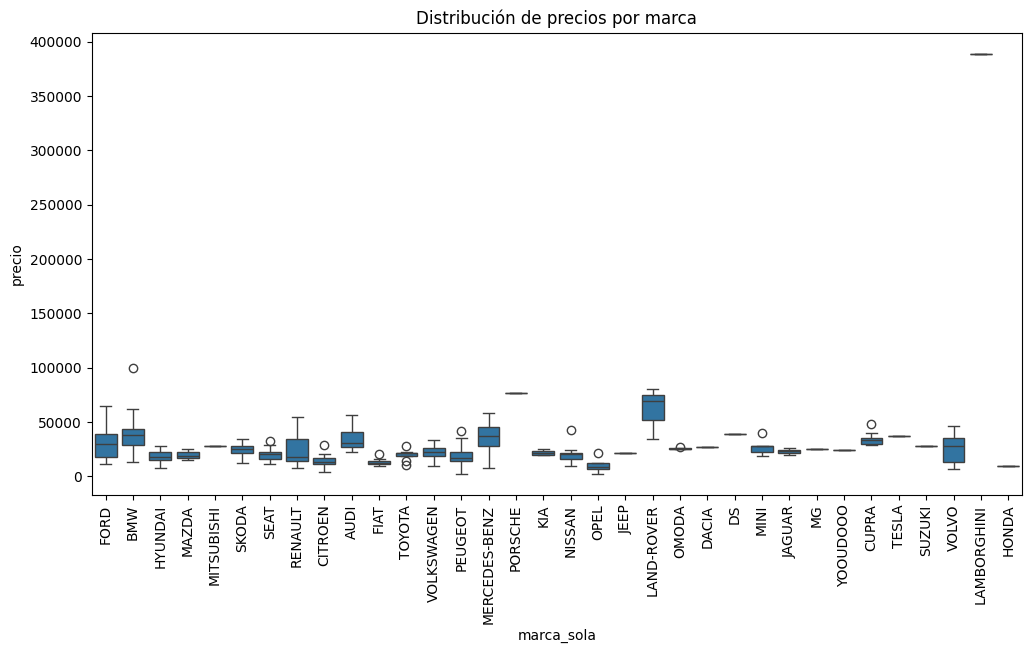

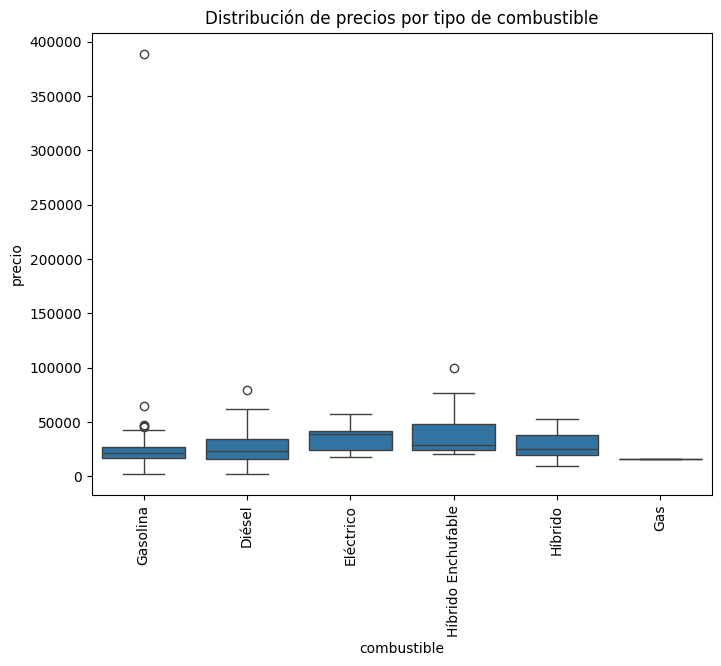

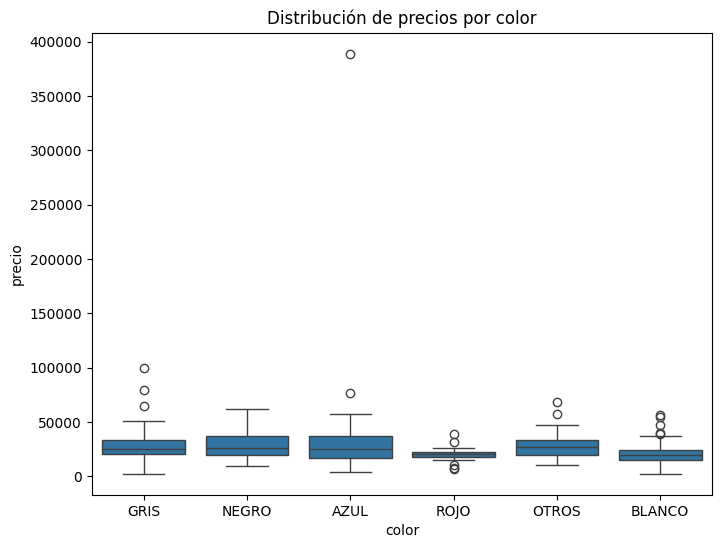

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='marca_sola', y='precio', data=df)
plt.xticks(rotation=90)
plt.title('Distribución de precios por marca')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='combustible', y='precio', data=df)
plt.title('Distribución de precios por tipo de combustible')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='color', y='precio', data=df)
plt.title('Distribución de precios por color')
plt.show()

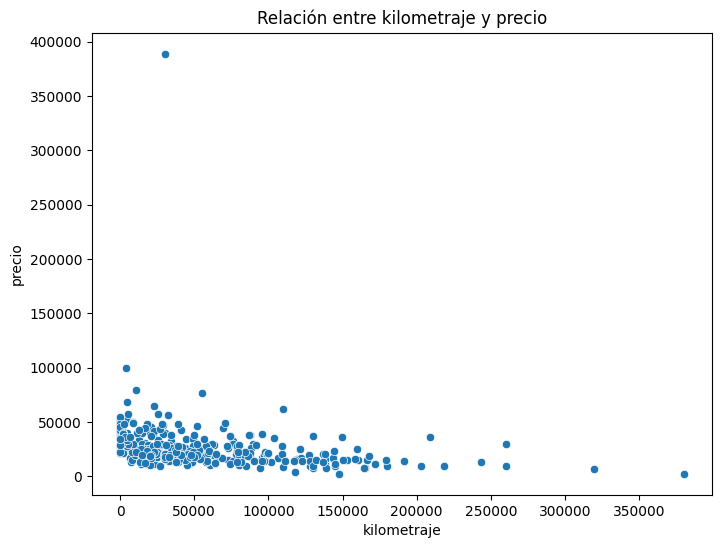

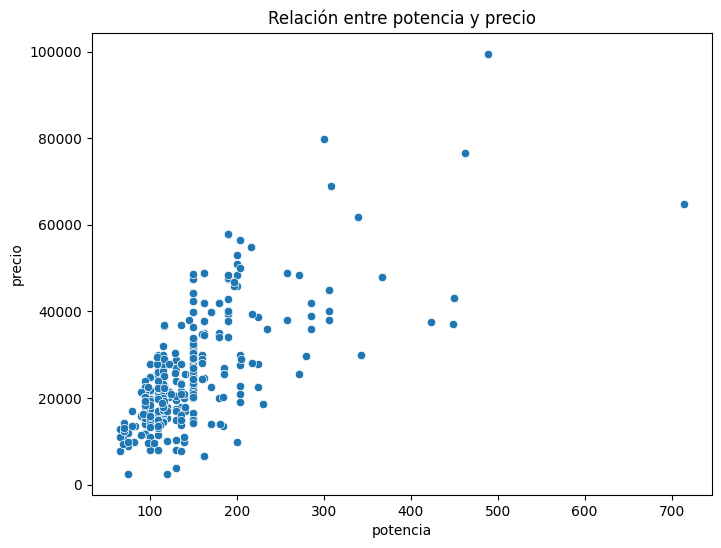

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='kilometraje', y='precio', data=df)
plt.title('Relación entre kilometraje y precio')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='potencia', y='precio', data=df)
plt.title('Relación entre potencia y precio')
plt.show()

## Relación precio y antigüedad de coches

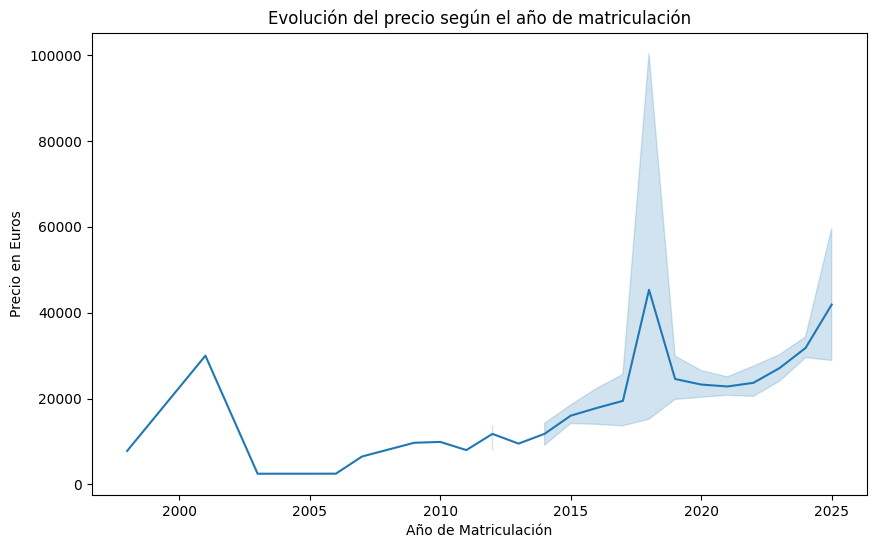

In [14]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='anio_matricula', y='precio', data=df)
plt.title('Evolución del precio según el año de matriculación')
plt.xlabel("Año de Matriculación") 
plt.ylabel("Precio en Euros")
plt.show()

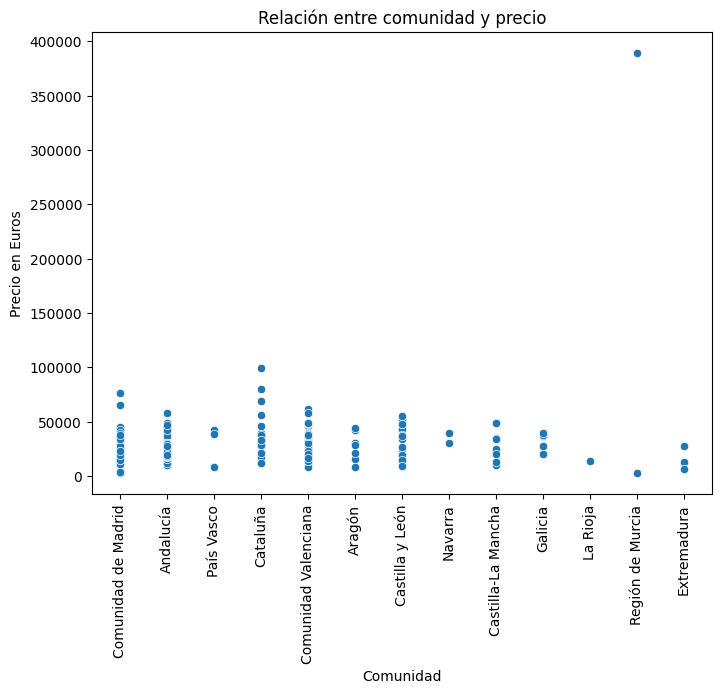

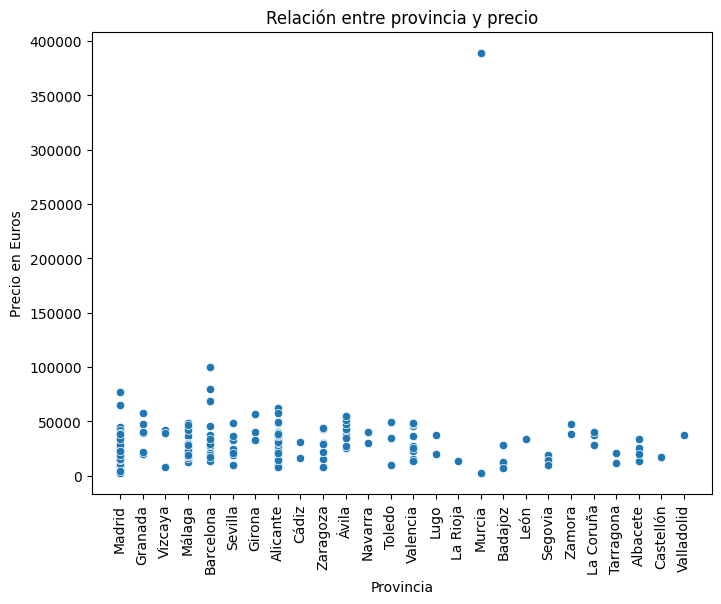

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='comunidad', y='precio', data=df)
plt.title('Relación entre comunidad y precio')
plt.xticks(rotation=90)
plt.xlabel("Comunidad") 
plt.ylabel("Precio en Euros")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='provincia', y='precio', data=df)
plt.title('Relación entre provincia y precio')
plt.xlabel("Provincia") 
plt.ylabel("Precio en Euros")
plt.xticks(rotation=90)
plt.show()

#plt.figure(figsize=(8, 6))
#sns.scatterplot(x='codigo_postal', y='precio', data=df)
#plt.title('Relación entre codigo postal y precio')
#plt.xlabel("Código Postal") 
#plt.ylabel("Precio en Euros")
#plt.xticks(rotation=90)
#plt.show()

In [16]:
df.columns

Index(['modelo_titulo', 'provincia', 'kilometraje', 'combustible',
       'distintivo_ambiental', 'garantia', 'cambio_automatico', 'carroceria',
       'plazas', 'potencia', 'puertas', 'color', 'precio',
       'vendedor_profesional', 'consumo_medio', 'certificado',
       'fecha_extraccion', 'referencia', 'marca_sola', 'mes_matricula',
       'anio_matricula', 'nombre_vendedor_profesional', 'peninsula_y_baleares',
       'comunidad'],
      dtype='object')

## Definir dos gráficos 


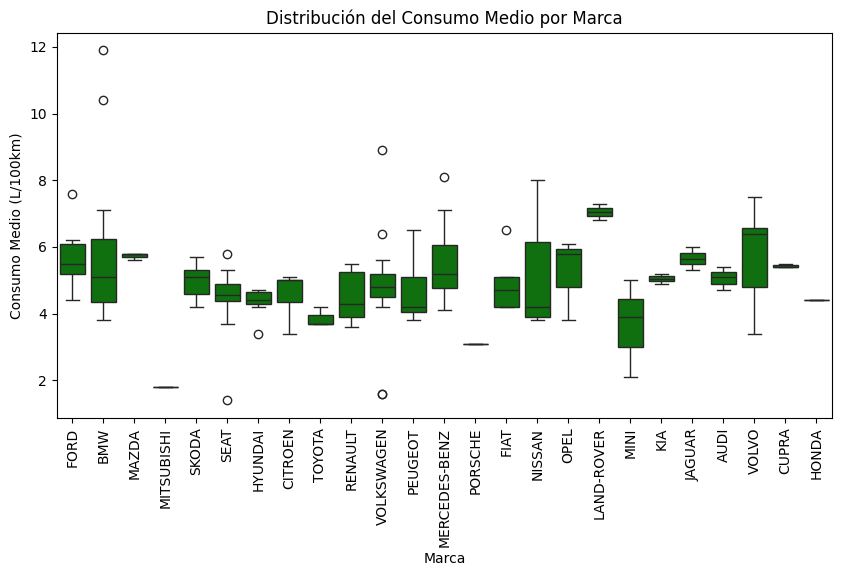

In [17]:
#Relación de consumo medio por marca
plt.figure(figsize=(10,5))

df_consumo = df[df['consumo_medio']>0] 

sns.boxplot(x='marca_sola', y='consumo_medio', data=df_consumo, color= 'green')

plt.xlabel('Marca')
plt.ylabel('Consumo Medio (L/100km)')
plt.title('Distribución del Consumo Medio por Marca')
plt.xticks(rotation=90)

plt.show()


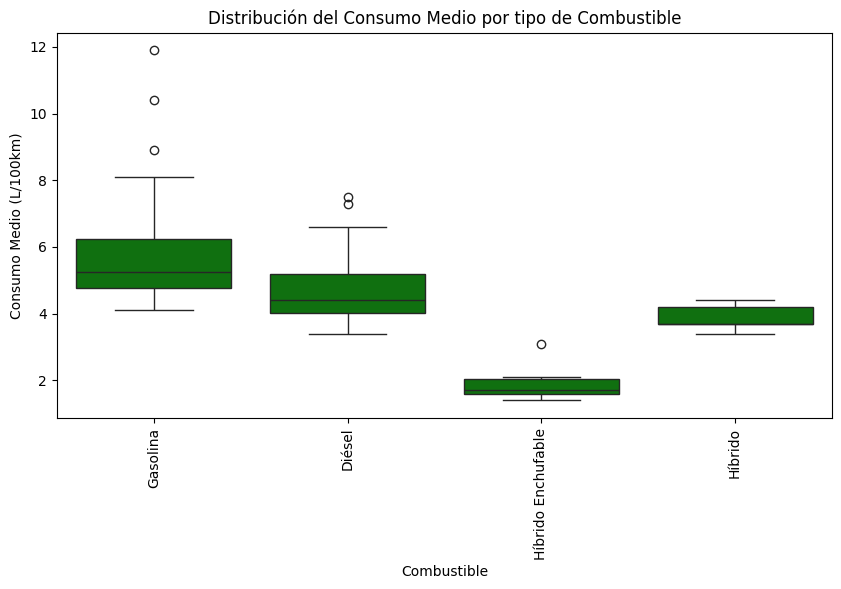

In [18]:
#Relación de consumo medio por tipo de combustible
plt.figure(figsize=(10,5))

sns.boxplot(x='combustible', y='consumo_medio', data=df_consumo, color= 'green')

plt.xlabel('Combustible')
plt.ylabel('Consumo Medio (L/100km)')
plt.title('Distribución del Consumo Medio por tipo de Combustible')
plt.xticks(rotation=90)

plt.show()

## Gráfico de outliers


La distribución de precios NO es normal (p <= 0.05), usaremos IQR (Tukey).


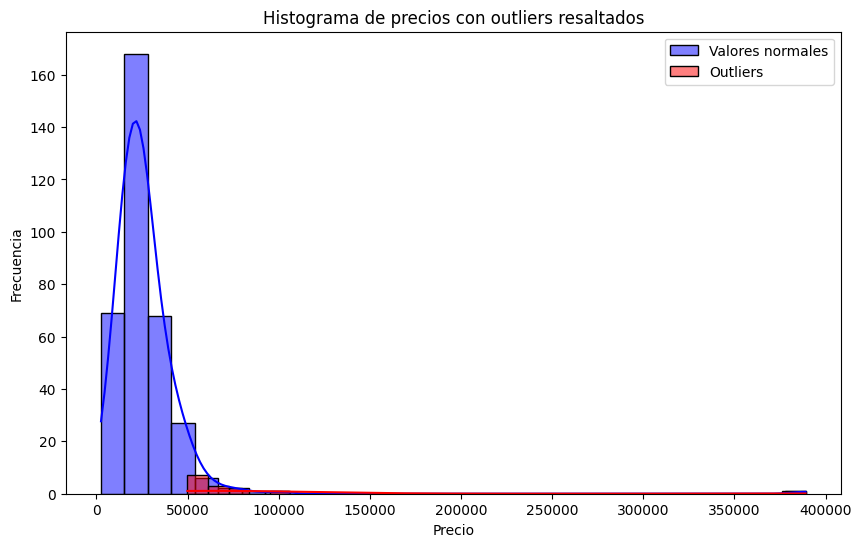

0       64900
3       57900
46      76490
59      99500
62      56500
79      52900
86      50990
87      54900
112     68900
114     79900
161     61900
194    389000
260     49900
280     57900
Name: precio, dtype: int64

In [19]:
from scipy.stats import normaltest, zscore

columna = "precio"

stat, p_value = normaltest(df[columna].dropna())  

# Si p > 0.05 tiene distribucion normal y usamos Z-Score, si no usamos Tukey
if p_value > 0.05:
    print("La distribución de precios es normal (p > 0.05), usaremos Z-Score.")
    z = 3  
    z_scores = zscore(df[columna].dropna())
    outliers = df[np.abs(z_scores) > z]
else:
    print("La distribución de precios NO es normal (p <= 0.05), usaremos IQR (Tukey).")
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    ric = q3 - q1
    lim_izq= q1 - 1.5 * ric
    lim_der = q3 + 1.5 * ric
    outliers = df[(df[columna] < lim_izq) | (df[columna] > lim_der)]

plt.figure(figsize=(10, 6))
sns.histplot(df[columna], bins=30, kde=True, color="blue", label="Valores normales")
sns.histplot(outliers[columna], bins=30, kde=True, color="red", label="Outliers")

plt.title("Histograma de precios con outliers resaltados")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

outliers[columna]

## MAPA COROPLETICO

In [20]:
df_agrupado1 = df.groupby("comunidad").agg(
    cantidad_coches=("precio", "count"),
    precio_medio=("precio", "mean")
).reset_index()


In [21]:
df_agrupado1

,comunidad,cantidad_coches,precio_medio
0,Andalucía,82,24168.890244
1,Aragón,9,25312.111111
2,Castilla y León,21,31870.428571
3,Castilla-La Mancha,7,26465.428571
4,Cataluña,23,33808.260870
5,Comunidad Valenciana,82,27467.085366
6,Comunidad de Madrid,98,21392.918367
7,Extremadura,4,14699.750000
8,Galicia,6,31683.333333
9,La Rioja,1,13500.000000


In [22]:
df_agrupado1['comunidad'] = df_agrupado1['comunidad'].replace({
    "Comunidad Valenciana": "Comunitat Valenciana",
    "Navarra": "Comunidad Foral de Navarra"
})
df_agrupado1

,comunidad,cantidad_coches,precio_medio
0,Andalucía,82,24168.890244
1,Aragón,9,25312.111111
2,Castilla y León,21,31870.428571
3,Castilla-La Mancha,7,26465.428571
4,Cataluña,23,33808.260870
5,Comunitat Valenciana,82,27467.085366
6,Comunidad de Madrid,98,21392.918367
7,Extremadura,4,14699.750000
8,Galicia,6,31683.333333
9,La Rioja,1,13500.000000


In [23]:
coordenadas_dict = {
    'Andalucía': [-6.933198279, 38.20515158308281],
    'Aragón': [41.146848953065074, -2.051693319],
    'Castilla y León': [-6.983543504, 41.971848179061865],
    'Castilla-La Mancha': [-5.041794734, 38.728673005078946],
    'Cataluña': [0.514946321, 40.52525092806802],
    'Comunitat Valenciana': [-0.762566145, 37.85512318608558],
    'Comunidad de Madrid': [-3.543904587, 41.165844754065],
    'Extremadura': [-6.931561659, 38.20820979208279],
    'Galicia': [-7.036202862, 43.54518304705791],
    'La Rioja': [42.63838404505985, -2.858067449],
    'Comunidad Foral de Navarra': [-2.415665965, 42.490538486060245],
    'País Vasco': [-3.415445197, 43.13413541505866],
    'Región de Murcia': [-1.545845412, 37.4076178540893]
}

df_agrupado1['coordenadas_comunidad'] = df_agrupado1['comunidad'].map(coordenadas_dict)

df_agrupado1

,comunidad,cantidad_coches,precio_medio,coordenadas_comunidad
0,Andalucía,82,24168.890244,"[-6.933198279, 38.20515158308281]"
1,Aragón,9,25312.111111,"[41.146848953065074, -2.051693319]"
2,Castilla y León,21,31870.428571,"[-6.983543504, 41.971848179061865]"
3,Castilla-La Mancha,7,26465.428571,"[-5.041794734, 38.728673005078946]"
4,Cataluña,23,33808.260870,"[0.514946321, 40.52525092806802]"
5,Comunitat Valenciana,82,27467.085366,"[-0.762566145, 37.85512318608558]"
6,Comunidad de Madrid,98,21392.918367,"[-3.543904587, 41.165844754065]"
7,Extremadura,4,14699.750000,"[-6.931561659, 38.20820979208279]"
8,Galicia,6,31683.333333,"[-7.036202862, 43.54518304705791]"
9,La Rioja,1,13500.000000,"[42.63838404505985, -2.858067449]"


In [24]:
df_agrupado1['precio_medio'] = df_agrupado1['precio_medio'].apply(lambda x: round(x,2))
df_agrupado1

,comunidad,cantidad_coches,precio_medio,coordenadas_comunidad
0,Andalucía,82,24168.89,"[-6.933198279, 38.20515158308281]"
1,Aragón,9,25312.11,"[41.146848953065074, -2.051693319]"
2,Castilla y León,21,31870.43,"[-6.983543504, 41.971848179061865]"
3,Castilla-La Mancha,7,26465.43,"[-5.041794734, 38.728673005078946]"
4,Cataluña,23,33808.26,"[0.514946321, 40.52525092806802]"
5,Comunitat Valenciana,82,27467.09,"[-0.762566145, 37.85512318608558]"
6,Comunidad de Madrid,98,21392.92,"[-3.543904587, 41.165844754065]"
7,Extremadura,4,14699.75,"[-6.931561659, 38.20820979208279]"
8,Galicia,6,31683.33,"[-7.036202862, 43.54518304705791]"
9,La Rioja,1,13500.00,"[42.63838404505985, -2.858067449]"


In [25]:
import json
import plotly.express as px

geojson_url_comunidades = "../src/geojson/comunidades_espana.geojson"

with open(geojson_url_comunidades) as f:
    geojson_data1 = json.load(f)

comunidades_geojson = pd.DataFrame([{
    'comunidad': feature['properties']['acom_name'],  
    'geometry': feature['geometry'] 
} for feature in geojson_data1['features']])

df_comunidades_coches = comunidades_geojson.merge(df_agrupado1[['comunidad', 'cantidad_coches','precio_medio']], on='comunidad', how='left')

df_comunidades_coches['cantidad_coches'] = df_comunidades_coches['cantidad_coches'].fillna(0).astype(int)
df_comunidades_coches['precio_medio'] = df_comunidades_coches['precio_medio'].fillna(0).astype(int)

fig = px.choropleth_mapbox(
    df_comunidades_coches,
    geojson=geojson_url_comunidades,               
    locations='comunidad',                  
    featureidkey="properties.acom_name",    
    color='cantidad_coches',                
    color_continuous_scale="reds",          
    mapbox_style="carto-positron",          
    center={"lat": 36.2, "lon": -7.3},  
    zoom=4,                         
    title="Densidad de Coches en Venta y Precio Medio por Comunidad Autónoma",
    hover_data={'comunidad': False, 'cantidad_coches': False,'precio_medio': False},  
    custom_data=['comunidad', 'cantidad_coches', 'precio_medio'],  
)

fig.update_layout(
    width=1180,  
    height=1024,  
    autosize=False,
    coloraxis_colorbar_title="Cantidad de Coches")  

fig.update_traces(
    hovertemplate="<b>Comunidad</b>: %{customdata[0]}<br><b>Cantidad de Coches</b>: %{customdata[1]}<br><b>Precio medio de Coches en la Comunidad</b>: €%{customdata[2]}"
)
fig.show()


C:\Users\Santiago Courel\AppData\Local\Temp\ipykernel_14648\3454113024.py:19: DeprecationWarning: *choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.choropleth_mapbox(


In [26]:
df.columns

Index(['modelo_titulo', 'provincia', 'kilometraje', 'combustible',
       'distintivo_ambiental', 'garantia', 'cambio_automatico', 'carroceria',
       'plazas', 'potencia', 'puertas', 'color', 'precio',
       'vendedor_profesional', 'consumo_medio', 'certificado',
       'fecha_extraccion', 'referencia', 'marca_sola', 'mes_matricula',
       'anio_matricula', 'nombre_vendedor_profesional', 'peninsula_y_baleares',
       'comunidad'],
      dtype='object')

In [27]:
df_agrupado2 = df.groupby('provincia').agg(
    cantidad_coches=('provincia', 'count'),  
    precio_medio=('precio', 'mean')         
).reset_index()
df_agrupado2['precio_medio'] = df_agrupado2['precio_medio'].apply(lambda x: round(x,2))
df_agrupado2.head()

,provincia,cantidad_coches,precio_medio
0,Albacete,4,22992.00
1,Alicante,69,27194.58
2,Badajoz,4,14699.75
3,Barcelona,18,34206.11
4,Castellón,1,16900.00


In [28]:
coordenadas_provincias = {
    "Álava": (42.8467, -2.6727),
    "Albacete": (38.9943, -1.8585),
    "Alicante": (38.3452, -0.4810),
    "Almería": (36.8402, -2.4679),
    "Asturias": (43.3614, -5.8593),
    "Ávila": (40.6566, -4.7003),
    "Badajoz": (38.8794, -6.9707),
    "Barcelona": (41.3851, 2.1734),
    "Burgos": (42.3439, -3.6969),
    "Cáceres": (39.4763, -6.3724),
    "Cádiz": (36.5298, -6.2923),
    "Cantabria": (43.1828, -3.9878),
    "Castellón": (39.9864, -0.0513),
    "Ciudad Real": (38.9863, -3.9291),
    "Córdoba": (37.8882, -4.7794),
    "Cuenca": (40.0718, -2.1316),
    "Girona": (41.9794, 2.8214),
    "Granada": (37.1773, -3.5986),
    "Guadalajara": (40.6332, -3.1676),
    "Guipúzcoa": (43.3128, -1.9746),
    "Huelva": (37.2614, -6.9447),
    "Huesca": (42.1362, -0.4087),
    "Illes Balears": (39.6953, 3.0176),
    "Jaén": (37.7796, -3.7849),
    "La Coruña": (43.3623, -8.4115),
    "La Rioja": (42.2871, -2.5396),
    "Las Palmas": (28.1235, -15.4363),
    "León": (42.5987, -5.5671),
    "Lleida": (41.6176, 0.6200),
    "Lugo": (43.0122, -7.5589),
    "Madrid": (40.4168, -3.7038),
    "Málaga": (36.7213, -4.4213),
    "Murcia": (37.9922, -1.1307),
    "Navarra": (42.6954, -1.6761),
    "Orense": (42.3366, -7.8631),
    "Palencia": (42.0097, -4.5282),
    "Pontevedra": (42.4304, -8.6441),
    "Salamanca": (40.9701, -5.6635),
    "Santa Cruz de Tenerife": (28.4636, -16.2518),
    "Segovia": (40.9429, -4.1088),
    "Sevilla": (37.3886, -5.9823),
    "Soria": (41.7636, -2.4646),
    "Tarragona": (41.1189, 1.2445),
    "Teruel": (40.3456, -1.1064),
    "Toledo": (39.8628, -4.0273),
    "Valencia": (39.4699, -0.3763),
    "Valladolid": (41.6523, -4.7245),
    "Vizcaya": (43.2630, -2.9340),
    "Zamora": (41.5033, -5.7434),
    "Zaragoza": (41.6488, -0.8891),
    "Ceuta": (35.8894, -5.3213),
    "Melilla": (35.2923, -2.9381)
}
df_agrupado2['coordenadas_provincias'] = df_agrupado2['provincia'].map(coordenadas_provincias)
df_agrupado2.head()

,provincia,cantidad_coches,precio_medio,coordenadas_provincias
0,Albacete,4,22992.00,"(38.9943, -1.8585)"
1,Alicante,69,27194.58,"(38.3452, -0.481)"
2,Badajoz,4,14699.75,"(38.8794, -6.9707)"
3,Barcelona,18,34206.11,"(41.3851, 2.1734)"
4,Castellón,1,16900.00,"(39.9864, -0.0513)"


In [29]:
geojson_url_provincias = '../src/geojson/provincias_espana.geojson'

with open(geojson_url_provincias, encoding="utf-8") as f:
    geojson_data2 = json.load(f)

In [30]:
df_provincias = set(df_agrupado2['provincia'].unique())
geojson_provincias = {feature['properties']['name'] for feature in geojson_data2['features']}

In [31]:
provincias_faltantes_geojson = df_provincias - geojson_provincias
print("Provincias en DataFrame pero NO en GeoJSON:", provincias_faltantes_geojson)

provincias_faltantes_df = geojson_provincias - df_provincias
print("Provincias en GeoJSON pero NO en DataFrame:", provincias_faltantes_df)

Provincias en DataFrame pero NO en GeoJSON: {'Valencia', 'Castellón', 'La Coruña', 'Alicante', 'Vizcaya'}
Provincias en GeoJSON pero NO en DataFrame: {'Palencia', 'Alacant/Alicante', 'Almería', 'Huesca', 'Ciudad Real', 'Ourense', 'Lleida', 'Las Palmas', 'Jaén', 'València/Valencia', 'Guadalajara', 'Castelló/Castellón', 'Pontevedra', 'Ceuta', 'Santa Cruz De Tenerife', 'Soria', 'A Coruña', 'Cuenca', 'Salamanca', 'Illes Balears', 'Burgos', 'Bizkaia/Vizcaya', 'Córdoba', 'Araba/Álava', 'Cantabria', 'Gipuzkoa/Guipúzcoa', 'Melilla', 'Cáceres', 'Asturias', 'Huelva', 'Teruel'}


In [32]:
correccion_nombres_df = {
    "Alicante": "Alacant/Alicante",
    "Vizcaya": "Bizkaia/Vizcaya",
    "La Coruña": "A Coruña",
    "Castellón": "Castelló/Castellón",
    "Valencia": "València/Valencia",
    "Álava": "Araba/Álava",
    "Guipúzcoa": "Gipuzkoa/Guipúzcoa",
    "Orense": "Ourense",
    "Baleares": "Illes Balears",
    "Santa Cruz de Tenerife": "Santa Cruz De Tenerife"
}
df_agrupado2['provincia'] = df_agrupado2['provincia'].replace(correccion_nombres_df)
df_agrupado2.head()

,provincia,cantidad_coches,precio_medio,coordenadas_provincias
0,Albacete,4,22992.00,"(38.9943, -1.8585)"
1,Alacant/Alicante,69,27194.58,"(38.3452, -0.481)"
2,Badajoz,4,14699.75,"(38.8794, -6.9707)"
3,Barcelona,18,34206.11,"(41.3851, 2.1734)"
4,Castelló/Castellón,1,16900.00,"(39.9864, -0.0513)"


In [33]:
geojson_url_provincias = '../src/geojson/provincias_espana.geojson'

provincias_geojson = pd.DataFrame([{
    'provincia': feature['properties']['name'],  
    'geometry': feature['geometry']
} for feature in geojson_data2['features']])

df_provincias_coches_precio = provincias_geojson.merge(df_agrupado2, on='provincia', how='left')

df_provincias_coches_precio['cantidad_coches'] = df_provincias_coches_precio['cantidad_coches'].fillna(0).astype(int)
df_provincias_coches_precio['precio_medio'] = df_provincias_coches_precio['precio_medio'].fillna(0)

fig = px.choropleth_mapbox(
    df_provincias_coches_precio,
    geojson=geojson_url_provincias,
    locations='provincia',                
    featureidkey="properties.name",  
    color='cantidad_coches',              
    color_continuous_scale="reds",        
    mapbox_style="carto-positron",        
    center={"lat": 40.416775, "lon": -3.703790},  
    zoom=4,                             
    title="Cantidad de Coches en Venta por Provincia",
    hover_data={'provincia': False, 'precio_medio': False},  
    custom_data=['provincia', 'cantidad_coches', 'precio_medio'],  
)

fig.update_traces(
    hovertemplate="<b>Provincia</b>: %{customdata[0]}<br><b>Cantidad de Coches</b>: %{customdata[1]}<br><b>Precio Medio</b>: %{customdata[2]:,.2f}€"
)
fig.update_layout(
    width=1180,  
    height=1024,  
    autosize=False,
    coloraxis_colorbar_title="Cantidad de Coches")
fig.show()

C:\Users\Santiago Courel\AppData\Local\Temp\ipykernel_14648\3692194678.py:13: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [34]:
concesionarios = pd.read_csv("../data/concesionarios.csv")

In [38]:
df_comunidades_coches

,comunidad,geometry,cantidad_coches,precio_medio
0,Ciudad Autónoma de Melilla,"{'coordinates': [[[-2.952638025, 35.3203002181...",0,0
1,Comunidad de Madrid,"{'coordinates': [[[[-3.539722192, 41.165041089...",98,21392
2,Castilla y León,"{'coordinates': [[[[-6.98576017, 41.9710393890...",21,31870
3,Comunidad Foral de Navarra,"{'coordinates': [[[[-2.420582303, 42.489234272...",2,34945
4,Principado de Asturias,"{'coordinates': [[[[-7.03319059, 43.5447344110...",0,0
5,Territorio no asociado a ninguna autonomía,"{'coordinates': [[[[-4.29789174, 35.1707642471...",0,0
6,Castilla-La Mancha,"{'coordinates': [[[[-5.04694842, 38.7290873800...",7,26465
7,Cantabria,"{'coordinates': [[[[-4.84102324, 43.1807799960...",0,0
8,Andalucía,"{'coordinates': [[[[-6.931561659, 38.208209792...",82,24168
9,Illes Balears,"{'coordinates': [[[[1.188330903, 38.8631971370...",0,0


In [36]:
concesionarios

,nombre,calle,municipio,provincia,codigo_postal
0,--AUTOMOVILES VIA NORTE --,Calle: C/ Rosalia De Castro 7 - 9,Municipio: Naron,Provincia: La coruña,Código postal: 15570
1,*ACS MOTOR*,"Calle: Carretera Villanueva De La Jara, 25",Municipio: Iniesta,Provincia: Cuenca,Código postal: 16235
2,+ QUE COCHES,Calle: Avda Pio Xii 85,Municipio: Talavera de la reina,Provincia: Toledo,Código postal: 45600
3,11ELEVEN,Calle: Concertar Cita Previa,Municipio: Madrid,Provincia: Madrid,Código postal: 28294
4,13 Premium Cars,"Calle: Cars Carrer Benito Pérez Galdós, 27,",Municipio: Aldaia,Provincia: Valencia,Código postal: 46960
...,...,...,...,...,...
4076,ZENCARS,Calle: Atendemos Con Cita Previa.,Municipio: Madrid,Provincia: Madrid,Código postal: 28049
4077,"ZENTRO MACHINE- CASE, S.A.",NaN,NaN,Provincia: Madrid,NaN
4078,ZOANSA TAILERRAK,"Calle: Pol. Ind. Alkaiaga, C. Banarta, 2,","Municipio: Lesaka, navarra",Provincia: Navarra,Código postal: 31770
4079,ZOE AUTOMOCION,Calle: Calle Greco S/N,Municipio: Sonseca,Provincia: Toledo,Código postal: 45100


In [35]:

geojson_url_municipios = '../src/geojson/municipios_espana.geojson'

with open(geojson_url_municipios, encoding='utf-8') as f:
    geojson_data = json.load(f)

municipios_geojson = pd.DataFrame([{
    'municipio': feature['properties']['municipio'],  
    'provincia': feature['properties']['provincia'],  
    'geometry': feature['geometry']
} for feature in geojson_data['features']])

municipios_geojson.head()



FileNotFoundError: [Errno 2] No such file or directory: '../src/geojson/municipios_espana.geojson'

In [ ]:
dif_df = set(df_agrupado_municipios['municipio']) - set(municipios_geojson['municipio'])

dif_geojson = set(municipios_geojson['municipio']) - set(df_agrupado_municipios['municipio'])

print("Municipios en DataFrame pero NO en GeoJSON:", dif_df)
print("Municipios en GeoJSON pero NO en DataFrame:", dif_geojson)


NameError: name 'df_agrupado_municipios' is not defined

In [ ]:
correccion_nombres_municipios = {
    "A Coruña": "A Coruña (municipio)",  
    "Elche": "Elx",  
    "San Sebastián": "Donostia/San Sebastián",  
    "Zarautz": "Zarautz (municipio)",  
    "Cádiz": "Cádiz (municipio)"
}

df_agrupado_municipios['municipio'] = df_agrupado_municipios['municipio'].replace(correccion_nombres_municipios)

dif_df = set(df_agrupado_municipios['municipio']) - set(municipios_geojson['municipio'])
dif_geojson = set(municipios_geojson['municipio']) - set(df_agrupado_municipios['municipio'])

print("Después de la corrección:")
print("Municipios en DataFrame pero NO en GeoJSON:", dif_df)
print("Municipios en GeoJSON pero NO en DataFrame:", dif_geojson)


In [ ]:
df_municipios_final = municipios_geojson.merge(
    df_agrupado_municipios, on=['municipio', 'provincia'], how='left'
).fillna(0)  
df_municipios_final.head()


In [ ]:
fig_municipios = px.choropleth_mapbox(
    df_municipios_final,
    geojson=geojson_url_municipios,
    locations='municipio',
    featureidkey="properties.municipio",
    color='cantidad_coches',  
    color_continuous_scale="reds",
    mapbox_style="carto-positron",
    center={"lat": 40.4168, "lon": -3.7038}, 
    zoom=6,
    title="Distribución de Coches en Venta por Municipio"
)

fig_municipios.show()
